# DeepAR metrics, continued with different datasets

Model: DeepAR

Dataset: exchange rate, exchange rate nips, solar, solar-energy, traffic, traffic nips, electricity nips

A continuation of the notebook deepar_metrics.ipynb where we try to find good and bad seeds using DeepAR with the same hyperparameters and seeds as previously. Do we see the same patterns of good and bad seeds for other datasets as well? Are the seeds different for every dataset?

In [1]:
from src.metrics import *

In [2]:
# Set some global variables
top_n = 10
metrics = ["MAPE"]

### Exchange rate

In [3]:
exchange_path = "/datadrive/experiments/deep_ar/exchange_rate/1B"
exp_ex = load_data(exchange_path)
len(exp_ex)

100

In [4]:
exp_ex[0].head(10)

,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
index,,,,,,,,,,,,,,,,,
0,0.0,1.605287e-03,1.026074,31.091047,1.036368,0.008791,3.890636,0.032977,0.032248,NaN,47.517278,0.514060,0.533333,1.026074,0.933333,0.371640,1.000000
1,1.0,1.572966e-02,3.340712,47.975410,1.599180,0.016455,6.767263,0.069816,0.066842,NaN,159.375450,3.414544,0.900000,3.340712,1.000000,0.962842,1.000000
2,2.0,5.195843e-03,1.969478,30.113565,1.003786,0.006396,10.264873,0.065534,0.063086,NaN,247.994498,2.066053,0.900000,1.969479,1.000000,0.571697,1.000000
3,3.0,3.979528e-03,1.644190,31.995962,1.066532,0.009511,5.762636,0.051627,0.049899,NaN,125.247163,1.547429,0.766667,1.644190,0.966667,0.497151,1.000000
4,4.0,2.716492e-06,0.049164,4.801961,0.160065,0.000207,7.910838,0.010234,0.010296,NaN,42.030561,0.035176,0.000000,0.049164,0.000000,0.017066,1.000000
5,5.0,7.172654e-07,0.022360,0.375037,0.012501,0.000103,7.269258,0.059780,0.062148,NaN,146.386877,0.007008,0.000000,0.022360,0.000000,0.019285,0.233333
6,6.0,1.067429e-03,0.870375,24.554323,0.818477,0.007422,3.909018,0.035506,0.034712,NaN,44.641824,0.395601,0.566667,0.870375,1.000000,0.322329,1.000000
7,7.0,1.134183e-03,0.892449,24.538731,0.817958,0.003404,8.739088,0.036403,0.035549,NaN,112.114968,0.469263,0.666667,0.892449,1.000000,0.313588,1.000000
8,0.0,1.664875e-03,1.068893,31.412418,1.047081,0.008773,4.061476,0.033992,0.033228,NaN,45.103030,0.475198,0.633333,1.068893,1.000000,0.385699,1.000000


In [5]:
exchange_array = calculate_timeseries_means(exp_ex, metrics, 8)
exchange_array.shape

(100, 8, 1)

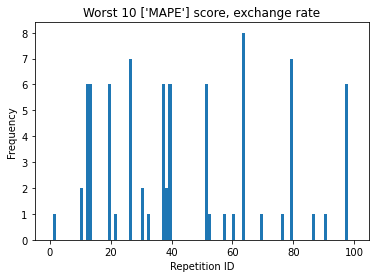

(array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 6., 6., 0., 0., 0.,
        0., 0., 6., 0., 1., 0., 0., 0., 0., 7., 0., 0., 0., 2., 0., 1., 0.,
        0., 0., 0., 6., 2., 6., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        6., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 8., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 7., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 6., 0., 0.]),
 array([63, 26, 79, 12, 37, 19, 51, 13, 39, 97]),
 array([8., 7., 7., 6., 6., 6., 6., 6., 6., 6.]))

In [6]:
ex_indexes_worst, ex_10_worst = np.unique(np.argsort(exchange_array, axis=0)[-top_n:], return_counts=True)
ex_worst_counts = plot_histogram(ex_indexes_worst, ex_10_worst, 100, metrics, f"Worst 10 {metrics} score, exchange rate")
ex_worst_counts, np.argsort(ex_worst_counts)[-10:][::-1], ex_worst_counts[np.argsort(ex_worst_counts)[-10:][::-1]]

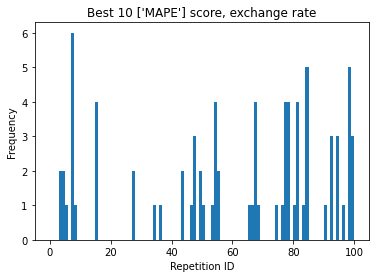

(array([0., 0., 0., 2., 2., 1., 0., 6., 1., 0., 0., 0., 0., 0., 0., 4., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 2., 0., 0., 1., 3., 0., 2., 1.,
        0., 0., 1., 4., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 4.,
        1., 0., 0., 0., 0., 0., 1., 0., 1., 4., 4., 0., 1., 4., 0., 1., 5.,
        0., 0., 0., 0., 0., 1., 0., 3., 0., 3., 0., 1., 0., 5., 3.]),
 array([ 7, 84, 98, 78, 77, 67, 15, 54, 81, 47]),
 array([6., 5., 5., 4., 4., 4., 4., 4., 4., 3.]))

In [7]:
ex_indexes_best, ex_10_best = np.unique(np.argsort(exchange_array, axis=0)[:top_n], return_counts=True)
ex_best_counts = plot_histogram(ex_indexes_best, ex_10_best, 100, metrics, f"Best 10 {metrics} score, exchange rate")
ex_best_counts, np.argsort(ex_best_counts)[-10:][::-1], ex_best_counts[np.argsort(ex_best_counts)[-10:][::-1]]

### Exchange rate nips

In [8]:
exchange_nips_path = "/datadrive/experiments/deep_ar/exchange_rate_nips/1B"
exp_ex_nips = load_data(exchange_nips_path)
len(exp_ex_nips)

100

In [9]:
exchange_nips_array = calculate_timeseries_means(exp_ex_nips, metrics, 8)
exchange_nips_array.shape

(100, 8, 1)

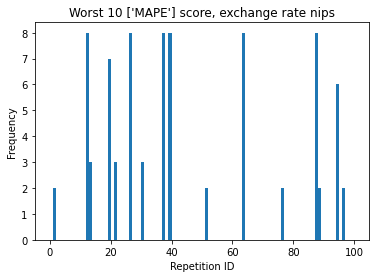

(array([0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 8., 3., 0., 0., 0.,
        0., 0., 7., 0., 3., 0., 0., 0., 0., 8., 0., 0., 0., 3., 0., 0., 0.,
        0., 0., 0., 8., 0., 8., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 8., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 8., 2., 0., 0., 0., 0., 0., 6., 0., 2., 0., 0., 0.]),
 array([39, 63, 12, 87, 37, 26, 19, 94, 30, 13]),
 array([8., 8., 8., 8., 8., 8., 7., 6., 3., 3.]))

In [10]:
ex_nips_indexes_worst, ex_nips_10_worst = np.unique(np.argsort(exchange_nips_array, axis=0)[-top_n:], return_counts=True)
ex_nips_worst_count = plot_histogram(ex_nips_indexes_worst, ex_nips_10_worst, 100, metrics, f"Worst 10 {metrics} score, exchange rate nips")
ex_nips_worst_count, np.argsort(ex_nips_worst_count)[-10:][::-1], ex_nips_worst_count[np.argsort(ex_nips_worst_count)[-10:][::-1]]

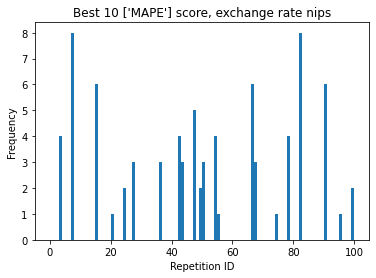

(array([0., 0., 0., 4., 0., 0., 0., 8., 0., 0., 0., 0., 0., 0., 0., 6., 0.,
        0., 0., 0., 1., 0., 0., 0., 2., 0., 0., 3., 0., 0., 0., 0., 0., 0.,
        0., 0., 3., 0., 0., 0., 0., 0., 4., 3., 0., 0., 0., 5., 0., 2., 3.,
        0., 0., 0., 4., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 3.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 4., 0., 0., 0., 8., 0., 0.,
        0., 0., 0., 0., 0., 6., 0., 0., 0., 0., 1., 0., 0., 0., 2.]),
 array([82,  7, 66, 15, 90, 47, 42, 54, 78,  3]),
 array([8., 8., 6., 6., 6., 5., 4., 4., 4., 4.]))

In [11]:
ex_nips_indexes_best, ex_nips_10_best = np.unique(np.argsort(exchange_nips_array, axis=0)[:top_n], return_counts=True)
ex_nips_best_count = plot_histogram(ex_nips_indexes_best, ex_nips_10_best, 100, metrics, f"Best 10 {metrics} score, exchange rate nips")
ex_nips_best_count, np.argsort(ex_nips_best_count)[-10:][::-1], ex_nips_best_count[np.argsort(ex_nips_best_count)[-10:][::-1]]

### Solar nips

In [12]:
solar_nips_path = "/datadrive/experiments/deep_ar/solar_nips/1B"
exp_solar_nips = load_data(solar_nips_path)
len(exp_solar_nips)

100

In [13]:
solar_nips_array = calculate_timeseries_means(exp_solar_nips, metrics, 137)
solar_nips_array.shape

(100, 137, 1)

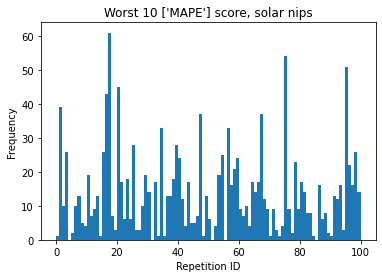

(array([ 1., 39., 10., 26.,  0.,  2., 10., 13.,  5.,  4., 19.,  7.,  9.,
        13.,  1., 26., 43., 61.,  7.,  3., 45., 17.,  6., 18.,  6., 28.,
         3.,  3., 10., 19., 14.,  0., 17.,  1., 33.,  1., 13., 13., 18.,
        28., 24., 12.,  4., 17.,  5.,  5.,  7., 37.,  1., 13.,  6.,  0.,
         4., 19., 25.,  0., 33., 16., 21., 24.,  9.,  7., 10.,  4., 17.,
        14., 17., 37., 12.,  9.,  1.,  9.,  3.,  1.,  4., 54.,  9.,  2.,
        23.,  9., 17., 14.,  8.,  8.,  1.,  0., 16.,  6.,  8.,  2.,  1.,
        13., 12., 16.,  3., 51., 22., 16., 26., 14.]),
 array([17, 75, 95, 20, 16,  1, 47, 67, 56, 34]),
 array([61., 54., 51., 45., 43., 39., 37., 37., 33., 33.]))

In [14]:
solar_nips_indexes_worst, solar_nips_10_worst = np.unique(np.argsort(solar_nips_array, axis=0)[-top_n:], return_counts=True)
solar_nips_worst_count = plot_histogram(solar_nips_indexes_worst, solar_nips_10_worst, 100, metrics, f"Worst 10 {metrics} score, solar nips")
solar_nips_worst_count, np.argsort(solar_nips_worst_count)[-10:][::-1], solar_nips_worst_count[np.argsort(solar_nips_worst_count)[-10:][::-1]]

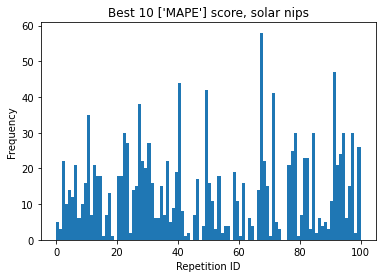

(array([ 5.,  3., 22., 10., 14., 12., 21.,  6., 10., 16., 35.,  7., 21.,
        18., 18.,  1.,  7., 13.,  1.,  0., 18., 18., 30., 27.,  2., 14.,
        15., 38., 22., 20., 27., 16.,  6.,  6., 15.,  7., 22.,  5.,  9.,
        19., 44.,  8.,  1.,  2.,  0.,  7., 17.,  0.,  4., 42., 16., 11.,
         3., 18.,  2.,  4.,  4.,  0., 19., 11.,  1., 16.,  0.,  6.,  4.,
         0., 14., 58., 22., 15.,  1., 41.,  5.,  3.,  0.,  0., 21., 25.,
        30.,  1.,  7., 23., 23.,  3., 30.,  2.,  6.,  4.,  5.,  3., 11.,
        47., 21., 24., 30.,  6., 15., 30.,  2., 26.]),
 array([67, 91, 40, 49, 71, 27, 10, 84, 97, 22]),
 array([58., 47., 44., 42., 41., 38., 35., 30., 30., 30.]))

In [15]:
solar_nips_indexes_best, solar_nips_10_best = np.unique(np.argsort(solar_nips_array, axis=0)[:top_n], return_counts=True)
solar_nips_best_count = plot_histogram(solar_nips_indexes_best, solar_nips_10_best, 100, metrics, f"Best 10 {metrics} score, solar nips")
solar_nips_best_count, np.argsort(solar_nips_best_count)[-10:][::-1], solar_nips_best_count[np.argsort(solar_nips_best_count)[-10:][::-1]]

### Traffic

In [16]:
traffic_path = "/datadrive/experiments/deep_ar/traffic/1A"
exp_traffic = load_data(traffic_path)
len(exp_traffic)

100

In [17]:
traffic_array = calculate_timeseries_means(exp_traffic, metrics, 862)
traffic_array.shape

(100, 862, 1)

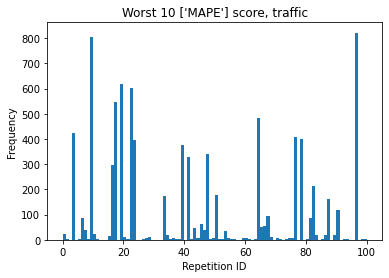

(array([ 24.,   2.,   0., 425.,   0.,   2.,  86.,  39.,   2., 806.,  22.,
          4.,   0.,   0.,   0.,  15., 296., 546.,   1., 618.,  10.,   5.,
        602., 398.,   1.,   0.,   2.,   7.,  12.,   1.,   1.,   1.,   1.,
        175.,  19.,   4.,   6.,   2.,   4., 377.,   1., 329.,   2.,  45.,
          6.,  63.,  38., 341.,   2.,   6., 178.,   4.,   5.,  34.,   8.,
          5.,   2.,   1.,   1.,   7.,   8.,   3.,   1.,   4., 485.,  49.,
         55.,  93.,  11.,   1.,   6.,   2.,   0.,   4.,   7.,   9., 408.,
          0., 401.,   0.,   3.,  87., 212.,  21.,   0.,   2.,  18., 161.,
          0.,  19., 120.,   1.,   3.,   2.,   0.,   0., 822.,   0.,   5.,
          3.]),
 array([96,  9, 19, 22, 17, 64,  3, 76, 78, 23]),
 array([822., 806., 618., 602., 546., 485., 425., 408., 401., 398.]))

In [18]:
traffic_indexes_worst, traffic_10_worst = np.unique(np.argsort(traffic_array, axis=0)[-top_n:], return_counts=True)
traffic_worst_count = plot_histogram(traffic_indexes_worst, traffic_10_worst, 100, metrics, f"Worst 10 {metrics} score, traffic")
traffic_worst_count, np.argsort(traffic_worst_count)[-10:][::-1], traffic_worst_count[np.argsort(traffic_worst_count)[-10:][::-1]]

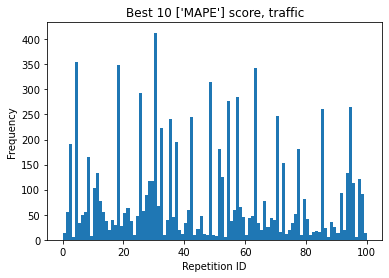

(array([ 14.,  55., 192.,   6., 354.,  34.,  50.,  56., 165.,   7., 104.,
        133.,  78.,  56.,  37.,  20.,  39.,  29., 349.,  28.,  53.,  64.,
         38.,  10.,  48., 292.,  57.,  89., 118., 118., 413.,  67., 223.,
         10.,  39., 240.,  45., 196.,  20.,  11.,  34.,  60., 245.,  10.,
         22.,  47.,  12.,   9., 315.,  10.,   8., 182., 125.,   6., 277.,
         37.,  59., 285.,  66.,  45.,  10.,  43.,  47., 343.,  33.,  20.,
         78.,  25.,  44.,  39., 247.,  16., 154.,  11.,  20.,  34.,  52.,
        181.,   9.,  82.,  41.,  10.,  15.,  17.,  16., 261.,  23.,   6.,
         36.,  26.,  13.,  94.,  19., 134., 265., 113.,   5., 122.,  92.,
         13.]),
 array([30,  4, 18, 63, 48, 25, 57, 54, 94, 85]),
 array([413., 354., 349., 343., 315., 292., 285., 277., 265., 261.]))

In [19]:
traffic_indexes_best, traffic_10_best = np.unique(np.argsort(traffic_array, axis=0)[:top_n], return_counts=True)
traffic_best_count = plot_histogram(traffic_indexes_best, traffic_10_best, 100, metrics, f"Best 10 {metrics} score, traffic")
traffic_best_count, np.argsort(traffic_best_count)[-10:][::-1], traffic_best_count[np.argsort(traffic_best_count)[-10:][::-1]]

### Traffic nips

In [20]:
traffic_nips_path = "/datadrive/experiments/deep_ar/traffic_nips/1A"
exp_traffic_nips = load_data(traffic_nips_path)
len(exp_traffic_nips)

100

In [21]:
traffic_nips_array = calculate_timeseries_means(exp_traffic_nips, metrics, 963)
traffic_nips_array.shape

(100, 963, 1)

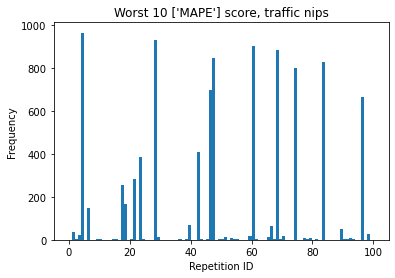

(array([  1.,  38.,   2.,  21., 963.,   1., 150.,   0.,   1.,   2.,   3.,
          1.,   0.,   0.,   4.,   3.,   1., 253., 165.,   1.,   2., 284.,
          1., 385.,   5.,   1.,   0.,   0., 929.,  12.,   0.,   0.,   0.,
          1.,   0.,   1.,   2.,   0.,   6.,  70.,   0.,   0., 410.,   2.,
          0.,   4., 696., 846.,   0.,   3.,   2.,  11.,   0.,   7.,   5.,
          6.,   0.,   0.,   0.,  16., 903.,   2.,   0.,   0.,   0.,  14.,
         66.,   6., 884.,   2.,  19.,   1.,   0.,   0., 799.,   1.,   0.,
         10.,   2.,  10.,   0.,   2.,   0., 827.,   0.,   0.,   1.,   0.,
          1.,  51.,   2.,   5.,   8.,   3.,   1.,   1., 663.,   0.,  28.,
          1.]),
 array([ 4, 28, 60, 68, 47, 83, 74, 46, 96, 42]),
 array([963., 929., 903., 884., 846., 827., 799., 696., 663., 410.]))

In [22]:
traffic_nips_indexes_worst, traffic_nips_10_worst = np.unique(np.argsort(traffic_nips_array, axis=0)[-top_n:], return_counts=True)
traffic_nips_worst_count = plot_histogram(traffic_nips_indexes_worst, traffic_nips_10_worst, 100, metrics, f"Worst 10 {metrics} score, traffic nips")
traffic_nips_worst_count, np.argsort(traffic_nips_worst_count)[-10:][::-1], traffic_nips_worst_count[np.argsort(traffic_nips_worst_count)[-10:][::-1]]

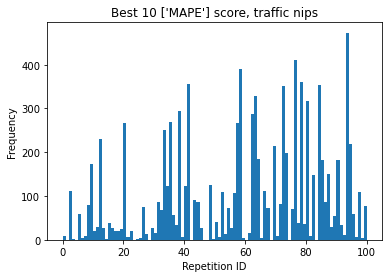

(array([  8.,   0., 112.,   2.,   0.,  60.,   3.,   8.,  79., 173.,  21.,
         29., 231.,  27.,   2.,  38.,  28.,  19.,  20.,  25., 267.,   6.,
         21.,   0.,   1.,   5.,  75.,  14.,   0.,  27.,  15.,  87.,  69.,
        251., 123., 268.,  56.,  33., 294.,   7., 123., 357.,   0.,  92.,
         87.,  28.,   0.,   0., 125.,   2.,  40.,   6., 109.,  14.,  72.,
         26., 108., 267., 390.,   3.,   0.,  16., 288., 329., 184.,   5.,
        111.,  72.,   0., 215.,   8.,  82., 352., 199.,   0.,  70., 410.,
         39., 360.,  35., 318.,   8., 147.,   0., 354., 183.,  87., 150.,
         30.,  54., 182.,  33.,  11., 473., 218.,  58.,   6., 110.,   3.,
         77.]),
 array([93, 76, 58, 78, 41, 84, 72, 63, 80, 38]),
 array([473., 410., 390., 360., 357., 354., 352., 329., 318., 294.]))

In [23]:
traffic_nips_indexes_best, traffic_nips_10_best = np.unique(np.argsort(traffic_nips_array, axis=0)[:top_n], return_counts=True)
traffic_nips_best_count = plot_histogram(traffic_nips_indexes_best, traffic_nips_10_best, 100, metrics, f"Best 10 {metrics} score, traffic nips")
traffic_nips_best_count, np.argsort(traffic_nips_best_count)[-10:][::-1], traffic_nips_best_count[np.argsort(traffic_nips_best_count)[-10:][::-1]]

### Solar-energy

In [24]:
solar_en_path = "/datadrive/experiments/deep_ar/solar-energy/1A"
exp_solar_en = load_data(solar_en_path)
len(exp_solar_en)

100

In [25]:
solar_en_array = calculate_timeseries_means(exp_solar_en, metrics, 137)
solar_en_array.shape

(100, 137, 1)

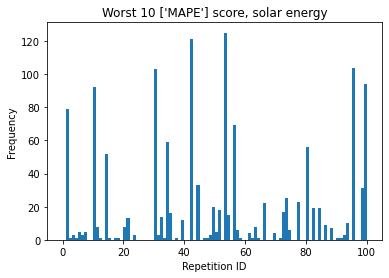

(array([  0.,  79.,   1.,   3.,   1.,   5.,   3.,   5.,   0.,   0.,  92.,
          8.,   1.,   0.,  52.,   1.,   0.,   1.,   1.,   0.,   8.,  13.,
          0.,   3.,   0.,   0.,   0.,   0.,   0.,   0., 103.,   3.,  14.,
          1.,  59.,  16.,   0.,   1.,   0.,  12.,   0.,   0., 121.,   0.,
         33.,   0.,   1.,   1.,   3.,  20.,   5.,  18.,   0., 125.,  15.,
          0.,  69.,   6.,   1.,   0.,   0.,   4.,   1.,   8.,   1.,   0.,
         22.,   0.,   0.,   4.,   0.,   1.,  17.,  25.,   6.,   0.,   0.,
         23.,   0.,   0.,  56.,   0.,  19.,   0.,  19.,   0.,   9.,   0.,
          7.,   0.,   1.,   1.,   3.,  10.,   0., 104.,   0.,   0.,  31.,
         94.]),
 array([53, 42, 95, 30, 99, 10,  1, 56, 34, 80]),
 array([125., 121., 104., 103.,  94.,  92.,  79.,  69.,  59.,  56.]))

In [26]:
solar_en_indexes_worst, solar_en_10_worst = np.unique(np.argsort(solar_en_array, axis=0)[-top_n:], return_counts=True)
solar_en_worst_count = plot_histogram(solar_en_indexes_worst, solar_en_10_worst, 100, metrics, f"Worst 10 {metrics} score, solar energy")
solar_en_worst_count, np.argsort(solar_en_worst_count)[-10:][::-1], solar_en_worst_count[np.argsort(solar_en_worst_count)[-10:][::-1]]

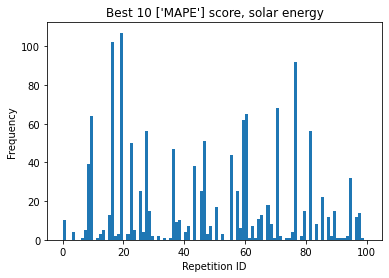

(array([ 10.,   0.,   0.,   4.,   0.,   0.,   1.,   5.,  39.,  64.,   0.,
          1.,   3.,   5.,   0.,  13., 102.,   2.,   3., 107.,   0.,   3.,
         50.,   5.,   0.,  25.,   4.,  56.,  15.,   2.,   0.,   2.,   0.,
          1.,   0.,   1.,  47.,   9.,  10.,   0.,   4.,   7.,   0.,  38.,
          0.,  25.,  51.,   3.,   7.,   0.,  17.,   0.,   3.,   0.,   0.,
         44.,   0.,  25.,   6.,  62.,  65.,   1.,   7.,   1.,  11.,  13.,
          0.,  18.,   8.,   1.,  68.,   2.,   0.,   1.,   1.,   4.,  92.,
          0.,   2.,  15.,   0.,  56.,   0.,   8.,   0.,  22.,   0.,  12.,
          2.,  15.,   1.,   1.,   1.,   2.,  32.,   0.,  12.,  14.,   1.,
          0.]),
 array([19, 16, 76, 70, 60,  9, 59, 27, 81, 46]),
 array([107., 102.,  92.,  68.,  65.,  64.,  62.,  56.,  56.,  51.]))

In [27]:
solar_en_indexes_best, solar_en_10_best = np.unique(np.argsort(solar_en_array, axis=0)[:top_n], return_counts=True)
solar_en_best_count = plot_histogram(solar_en_indexes_best, solar_en_10_best, 100, metrics, f"Best 10 {metrics} score, solar energy")
solar_en_best_count, np.argsort(solar_en_best_count)[-10:][::-1], solar_en_best_count[np.argsort(solar_en_best_count)[-10:][::-1]]